# Introduction


## Can you predict which passengers were transported to another dimension?

The Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Though the ship stayed intact, almost half  of the passengers were transported to an alternate dimension! To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system. You will be encouraged to use a variety of different modeling techniques – as different models will give you different levels of confidence – use different ones and identify your best solution.








## Import Libraries

In [1]:
# Import libraries

import itc_utils.flight_service as itcfs

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Data prediction
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import metrics



## Load CSV Data

In [2]:
readClient = itcfs.get_flight_client()

nb_data_request = {
    'data_name': """train_project2.csv""",
    'interaction_properties': {
        #'row_limit': 500,
        'infer_schema': 'true',
        'infer_as_varchar': 'false'
    }
}


# load training data
flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)
df_train = itcfs.read_pandas_and_concat(readClient, flightInfo, timeout=240)

nb_data_request = {
    'data_name': """test_project2.csv""",
    'interaction_properties': {
        #'row_limit': 500,
        'infer_schema': 'true',
        'infer_as_varchar': 'false'
    }
}


# load test data
flightInfo = itcfs.get_flight_info(readClient, nb_data_request=nb_data_request)
df_test = itcfs.read_pandas_and_concat(readClient, flightInfo, timeout=240)


## Data Discovery


In this step I will explore the data collected and list its various characteristics

### Merge data sets to find common characteristics.

In [3]:
df_data = pd.concat([df_test, df_train])

### Lets take a peek at the data set

In [4]:
df_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,NaN
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,NaN
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,NaN
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,NaN


### Data column information and data types.

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


### Data set statistics.

In [6]:
df_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df_train.info()

# describe data

df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 950.9+ KB


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Data Pre-Processing

## 1. Find and remove outliers

### Plot data distribution without null values

The distribution of the data allows us to see the range of values as well as any potential outliers.

Age Histogram: Shows that the majority of the passenger's ages lie between 0 and 50.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Histograms: All of these plots are have the majority of their values skewed towards 0.

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

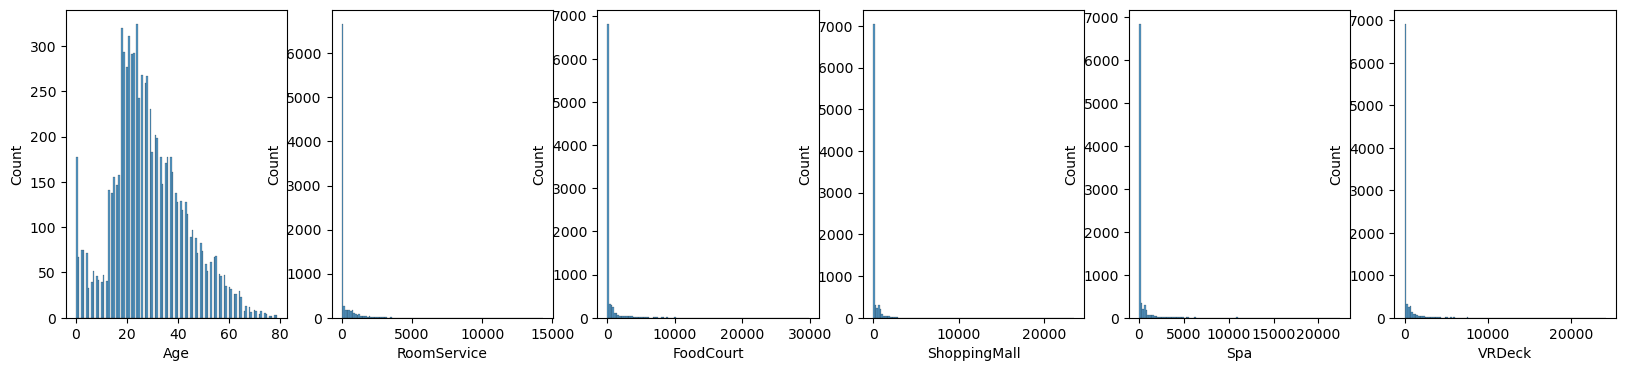

In [8]:
# Identify outliers in data and remove them

# This is done by comparing max and min values to the mean of each column


# based on the describe method we can see that the columns: Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa and VRDeck all have outliers.
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 4))

sns.histplot(df_train['Age'].dropna(),ax=axes[0],bins=120)
sns.histplot(df_train['RoomService'].dropna(),ax=axes[1],bins=120)
sns.histplot(df_train['FoodCourt'].dropna(),ax=axes[2],bins=120)
sns.histplot(df_train['ShoppingMall'].dropna(),ax=axes[3],bins=120)
sns.histplot(df_train['Spa'].dropna(),ax=axes[4],bins=120)
sns.histplot(df_train['VRDeck'].dropna(),ax=axes[5],bins=120)



### Box Plots

While a box plot can be used as an effective tool to show the distribution of a set of data, it is only an effective visual for the 'age' column as the other numeric columns all have the majority of their values within close proximity to 0 which makes the quartile ranges seemingly indistinguishable from one another.

Age                AxesSubplot(0.125,0.11;0.110714x0.77)
RoomService     AxesSubplot(0.257857,0.11;0.110714x0.77)
FoodCourt       AxesSubplot(0.390714,0.11;0.110714x0.77)
ShoppingMall    AxesSubplot(0.523571,0.11;0.110714x0.77)
Spa             AxesSubplot(0.656429,0.11;0.110714x0.77)
VRDeck          AxesSubplot(0.789286,0.11;0.110714x0.77)
dtype: object

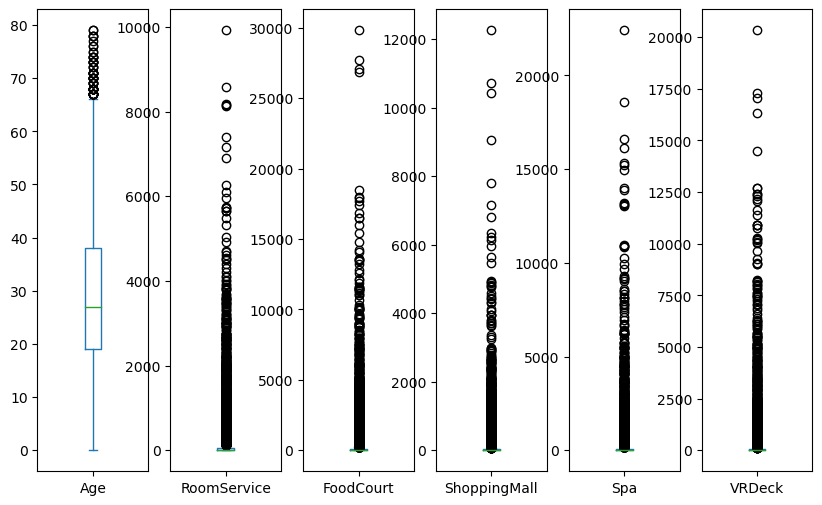

In [9]:
df_train.dropna().plot(kind='box',subplots=True, figsize=(10,6))

### Identifying the outliers

#### Lets identify the appropiate quartile range for our data set.

Normally whenever we are finding outliers we scale the IQR by 1.5 if our data set follows a normal distribution. 
In this case the majority of our data is leftly skewed so this method won't work. Instead we will keep data based on its quantile.


Typically we would use both a upper and lower quantile to classify outliers however, based on the describe method used on the training data we were able to see that the the 25% quantile value is 0 which makes up the majority of our data set. Due to this we can rule out the need to use a lower quantile and instead focus on values that are much larger than the average values in the data set.

In [10]:
df_train_new = df_train.copy(deep=True)

cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
removeIndices = set()
i = 0
while(i < len(cols)):
    quantile = df_train_new[cols[i]].quantile(.95)
    print(quantile)
    removeIndices.update(df_train_new.index[(df_train_new[cols[i]] > quantile)])
    i = i+1

    
df_train_new.drop(index=list(removeIndices), inplace=True)

56.0
1274.249999999999
2748.499999999978
927.7999999999993
1607.0999999999985
1534.1999999999825


### Let's view the statistics of our new data set.

In [11]:
df_train_new.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6504.000000,6508.000000,6515.000000,6493.000000,6507.00000,6502.000000
mean,26.112085,110.440535,128.364236,80.461728,97.22253,90.725008
std,13.042999,263.079356,373.160879,202.176229,256.34096,246.455011
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,35.000000,8.000000,3.000000,5.000000,5.00000,2.000000
max,56.000000,1269.000000,2727.000000,927.000000,1600.00000,1513.000000


## 2. Replace Null Values

Since we have now removed outliers in our data set we can replace null values with their averages.


### Count null values

In [12]:
df_train_new.isnull().sum()

PassengerId       0
HomePlanet      157
CryoSleep       161
Cabin           150
Destination     150
Age             154
VIP             164
RoomService     150
FoodCourt       143
ShoppingMall    165
Spa             151
VRDeck          156
Name            145
Transported       0
dtype: int64

### Replace null values with their average

In [13]:
values = {'Age': 26, "RoomService": 110.44, "FoodCourt": 128.36, "ShoppingMall": 80.46, "Spa": 97.22, "VRDeck": 90.73}
df_train_new.fillna(value=values, inplace=True)


### How should we tackle replacing the null values of the non-numeric columns?

The columns PassengerId, HomePlanet, VIP, CryoSleep, Cabin, Destination and Transported all have values that are non-numeric.

PassengerId: Place passengers into certain groups based on their prefix.

HomePlanet: specifies the planet that the passengers are from. Should I treat all of the passengers who have N/A as being born on the ship? I should see if there is any correlation between age and this column.

CryoSleep: The N/A in this field may be a symptom of the same cause as HomePlanet. Passengers may have been born on the ship  which means they may be too young to be entered into cryosleep. I should explore whether or not this column is tied to age or not.

<span style="color:red"> Cabin: The Cabin column is difficult as there could me multiple interpretations of a passenger not filling a cabin. We will explore this more in later sections.</span>

Destination: We will fill this column with the average.

Transported: There are no null values.



In [14]:
df_train_new.describe(exclude=np.number)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,6658,6501,6497,6508,6508,6494,6513,6658
unique,6658,3,2,5299,3,2,6501,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Sus Coolez,True
freq,1,4117,3589,8,4529,6421,2,3664


### Replace values of columns according to their respective distributions
---

### Distribution of HomePlanet

<AxesSubplot:ylabel='HomePlanet'>

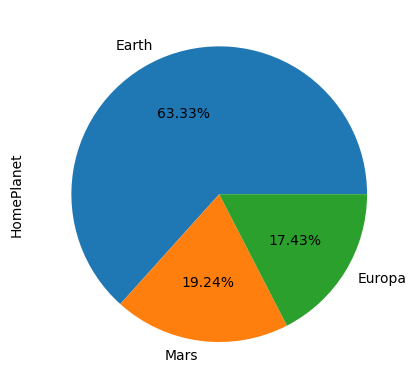

In [15]:
df_train_new['HomePlanet'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [16]:
df_train_new['HomePlanet'] = df_train_new['HomePlanet'].apply(lambda x: x if not pd.isnull(x) else np.random.choice(['Earth', 'Europa', 'Mars', ],p =[.6333,.1743,.1924]))

### Distribution of Destination

<AxesSubplot:ylabel='Destination'>

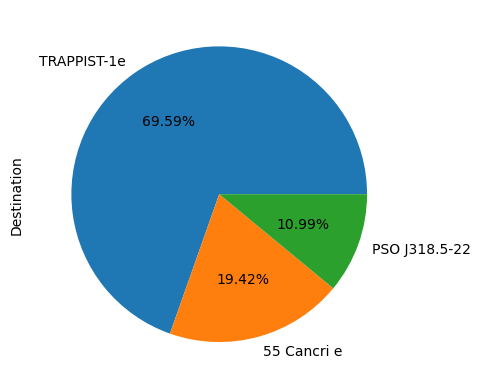

In [17]:
df_train_new['Destination'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [18]:
df_train_new['Destination'] = df_train_new['Destination'].apply(lambda x: x if not pd.isnull(x) else np.random.choice(['TRAPPIST-1E', 'PSO J318,5-22', '55 Cancri e', ],p =[.7,.11,.19]))

### Distribution of CryoSleep

<AxesSubplot:ylabel='CryoSleep'>

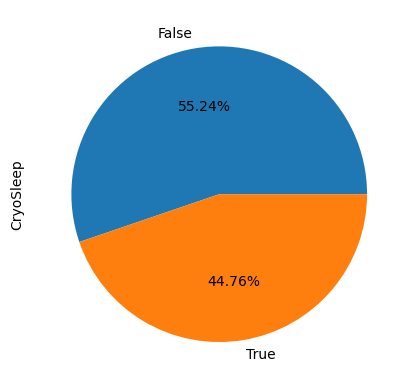

In [19]:
df_train_new['CryoSleep'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [20]:
df_train_new['CryoSleep'] = df_train_new['CryoSleep'].apply(lambda x: x if not pd.isnull(x) else np.random.choice(['False', 'True'],p =[.55,.45]))

### Distribution of VIP

<AxesSubplot:ylabel='VIP'>

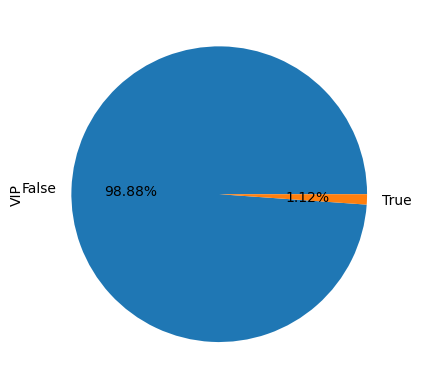

In [21]:
df_train_new['VIP'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [22]:
df_train_new['VIP'] = df_train_new['VIP'].apply(lambda x: x if not pd.isnull(x) else np.random.choice(['False', 'True'],p =[.99,.01]))

### Distribution of Cabin

#### Unlike the other categorical values cabin is dependent on the value of  the 'VIP' column

Due to this fact we are going to assign values not only based on distribution but also VIP status.

In [23]:
df_train_new['Cabin'] = df_train_new['Cabin'].apply(lambda x: x[:1] if not pd.isnull(x) else np.nan)
df_train_new.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True


### VIP Status = True

<AxesSubplot:ylabel='Cabin'>

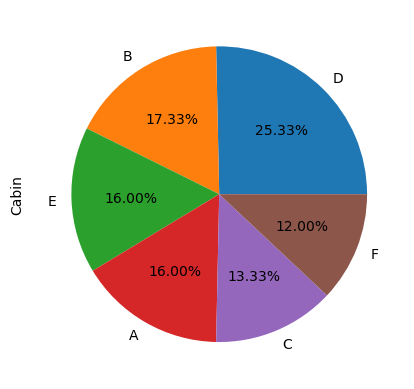

In [24]:
df_train_new[(df_train_new['VIP'] == 'True')]['Cabin'].value_counts().plot(kind='pie', autopct='%1.2f%%')

In [25]:
df_train_new.update(df_train_new[(df_train_new['VIP'] == 'True')]['Cabin'].apply(lambda x: x if not pd.isnull(x) else np.random.choice(['A', 'B', 'C', 'D', 'E', 'F' ],p =[.16,.18,.12,.25,.16,.12])))

In [26]:
df_train_new.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           150
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            145
Transported       0
dtype: int64

### VIP Status = False

<AxesSubplot:ylabel='Cabin'>

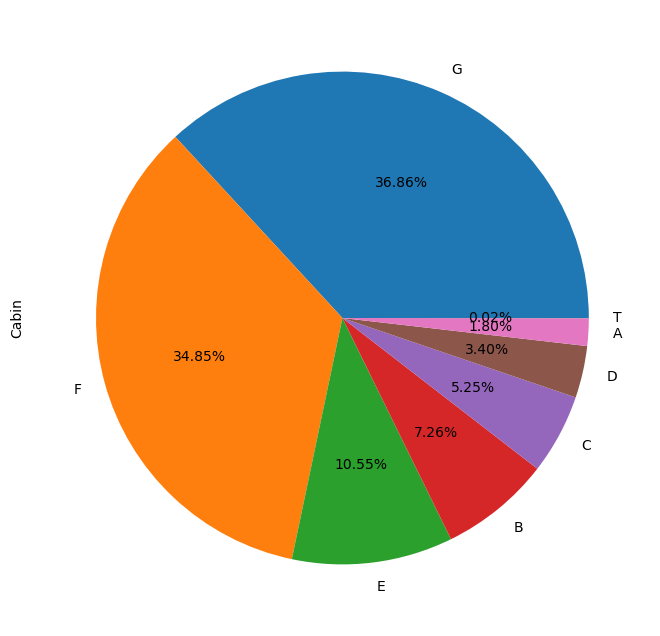

In [27]:
df_train_new[(df_train_new['VIP'] == 'False')]['Cabin'].value_counts().plot(kind='pie', autopct='%1.2f%%',figsize=(12,8))

In [28]:
df_train_new.update(df_train_new[(df_train_new['VIP'] == 'False')]['Cabin']
                    .apply(lambda x: x if x is not np.nan else np.random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],p =[.018,.0726,.0527,.0342,.1055,.3484,.3684,.0002])))

In [29]:
df_train_new[(df_train_new['VIP'] == 'False')]['Cabin'].isnull().sum()

0

### Represent our categorical variables in a numeric fashion

In [30]:
df_train_new = pd.get_dummies(df_train_new, columns=['HomePlanet', 'Destination', 'Cabin'])
df_train_new['CryoSleep'].replace({'True': 1, 'False': 0}, inplace = True)
df_train_new['VIP'].replace({'True': 1, 'False': 0}, inplace = True)
df_train_new['Transported'].replace({'True': 1, 'False': 0}, inplace = True)

# Data Analysis

Check to see if there is any correlation between the variabels and see what features are important to our model

In [31]:
train, test = train_test_split(df_train_new, test_size=0.2)

x_train = train.drop(columns=['Transported', 'Name'])
x_test = test.drop(columns=['Transported', 'Name'])
y_train = train['Transported'].astype(int)
y_test = test['Transported'].astype(int)

### Import new modules

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

### Select relevant features based on  Recursive feature elimination (RFE).

In [33]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Limit our data set to the relevant features

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Accuracy VS. # Number of Features

[Text(0.5, 1.0, 'DT Accuracy Vs. # Of Features')]

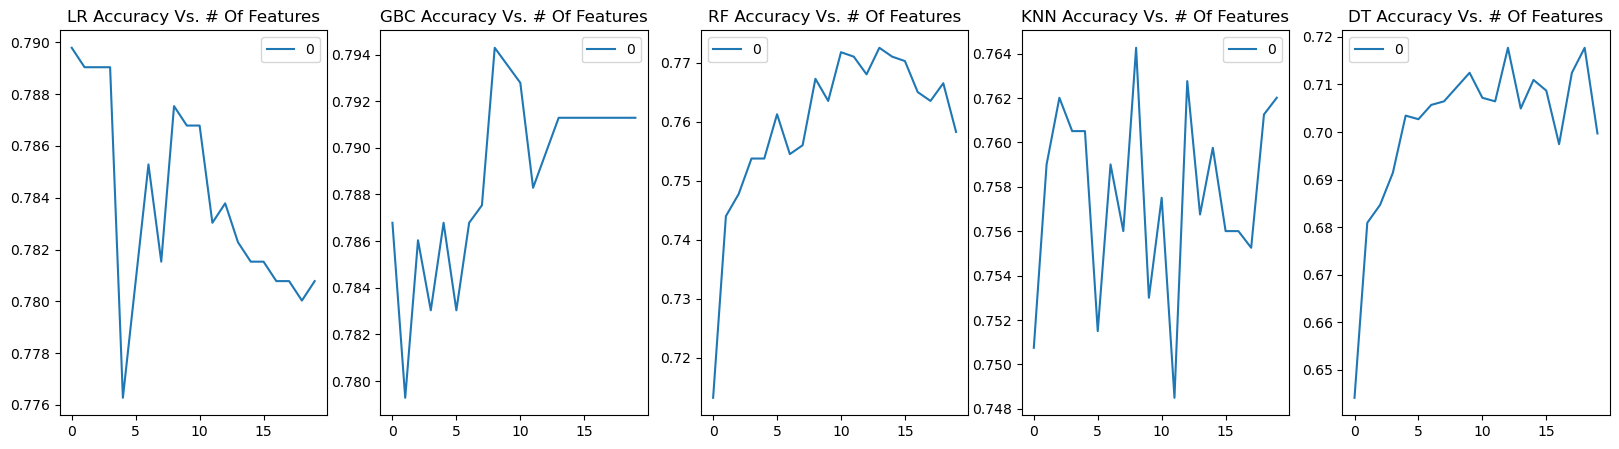

In [35]:
# instantiate models
lrModel = LogisticRegression(random_state=23)
gbc = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42).fit(x_train,y_train)
svc = SVC(random_state=42,kernel="rbf").fit(x_train,y_train)
dt = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)




x_train_t = x_train
x_test_t = x_test

# make arrays for # features vs score
lrArr =[]
gbcArr = []
rfArr = []
knnArr = []
dtArr = []



for i in range(5,25):
#     map prediction values to array
    
    rfe = RFE(lrModel, n_features_to_select=i)
    rfe.fit(x_train, y_train)
    x_train_t = rfe.transform(x_train)
    x_test_t = rfe.transform(x_test)
    lrModel.fit(x_train_t, y_train)
    lrArr.append(lrModel.score(x_test_t, y_test))
    
#     gbc
    rfe = RFE(gbc, n_features_to_select=i)
    rfe.fit(x_train, y_train)
    x_train_t = rfe.transform(x_train)
    x_test_t = rfe.transform(x_test)
    gbc.fit(x_train_t,y_train)
    gbcArr.append(gbc.score(x_test_t,y_test))
    
#     rf
    rfe = RFE(rf, n_features_to_select=i)
    rfe.fit(x_train, y_train)
    x_train_t = rfe.transform(x_train)
    x_test_t = rfe.transform(x_test)
    rf.fit(x_train_t,y_train)
    rfArr.append(rf.score(x_test_t,y_test))
    
    
#     knn
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knnArr.append(knn.score(x_test, y_test))
    
#     dt
    rfe = RFE(dt, n_features_to_select=i)
    rfe.fit(x_train, y_train)
    x_train_t = rfe.transform(x_train)
    x_test_t = rfe.transform(x_test)
    dt.fit(x_train_t,y_train)
    dtArr.append(dt.score(x_test_t,y_test))



fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))


# SVC is special case as RFE and non linear kernels are not compatible

svc.fit(x_train,y_train)



sns.lineplot(data=pd.DataFrame(lrArr),ax=axes[0]).set(title='LR Accuracy Vs. # Of Features')
sns.lineplot(data=pd.DataFrame(gbcArr),ax=axes[1]).set(title='GBC Accuracy Vs. # Of Features')
sns.lineplot(data=pd.DataFrame(rfArr),ax=axes[2]).set(title='RF Accuracy Vs. # Of Features')
sns.lineplot(data=pd.DataFrame(knnArr),ax=axes[3]).set(title='KNN Accuracy Vs. # Of Features')
sns.lineplot(data=pd.DataFrame(dtArr),ax=axes[4]).set(title='DT Accuracy Vs. # Of Features')

### Lets look at our model performance

In [36]:
modelScores = pd.DataFrame({"model":['LR','GBC','RF','SVC', 'KNN','DT'],"Test": [max(lrArr),max(gbcArr),max(rfArr),svc.score(x_test,y_test),max(knnArr),max(dtArr)] }).sort_values(by='Test', ascending=False).T
modelScores

,1,0,3,2,4,5
model,GBC,LR,SVC,RF,KNN,DT
Test,0.794294,0.78979,0.785285,0.772523,0.764264,0.717718


### Based on the model scores for our test data it seems that GBC is the best model for our data.
---

### Lets choose the number of features which maximizes our GBC scores

In [37]:
optimalNumberOfFeatures = gbcArr.index(max(gbcArr))
print(optimalNumberOfFeatures)

8


## Instantiating our final model

In [38]:
rfe = RFE(gbc, n_features_to_select=optimalNumberOfFeatures)
rfe.fit(x_train, y_train)
x_train_t = rfe.transform(x_train)
x_test_t = rfe.transform(x_test)
gbc.fit(x_train_t,y_train)


Submission_Model = gbc